In [118]:
# set up libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB
from model_evaluation import Evaluation

In [88]:
# load datasets
X_train = pd.read_csv("X_train.csv")
X_val = pd.read_csv("X_val.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_val = pd.read_csv("y_val.csv")
y_test = pd.read_csv("y_test.csv")

y_train = y_train.to_numpy().flatten()
y_val = y_val.to_numpy().flatten()
y_test = y_test.to_numpy().flatten()

In [92]:
# for Naive Bayes, we do not use one-hot encoding.
# convert one-hot encoding to ordinal encoding-
# https://stackoverflow.com/questions/50607740/reverse-a-get-dummies-encoding-in-pandas
def undummify(df, prefix_sep="_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

In [93]:
X_train.rename({'CRASH_DATE_dayofweek': 'dayofweek', 'CRASH_TIME_hour': 'hour'}, axis=1, inplace=True)
X_val.rename({'CRASH_DATE_dayofweek': 'dayofweek', 'CRASH_TIME_hour': 'hour'}, axis=1, inplace=True)
X_test.rename({'CRASH_DATE_dayofweek': 'dayofweek', 'CRASH_TIME_hour': 'hour'}, axis=1, inplace=True)

In [94]:
X_train = undummify(X_train)
X_val = undummify(X_val)
X_test = undummify(X_test)

In [95]:
enc = OrdinalEncoder()
enc.fit(X_train[["SUBURB", "CRASH", "LIGHTING", "ROAD", "WEATHER"]])
X_train[["SUBURB", "CRASH", "LIGHTING", "ROAD", "WEATHER"]] = enc.transform(X_train[["SUBURB", "CRASH", "LIGHTING", "ROAD", "WEATHER"]])
X_val[["SUBURB", "CRASH", "LIGHTING", "ROAD", "WEATHER"]] = enc.transform(X_val[["SUBURB", "CRASH", "LIGHTING", "ROAD", "WEATHER"]])
X_test[["SUBURB", "CRASH", "LIGHTING", "ROAD", "WEATHER"]] = enc.transform(X_test[["SUBURB", "CRASH", "LIGHTING", "ROAD", "WEATHER"]])

In [96]:
X_train["DISTANCE"] = pd.cut(X_train["DISTANCE"], bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],labels=[0,1,2,3,4,5,6,7,8,9])
X_val["DISTANCE"] = pd.cut(X_val["DISTANCE"], bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],labels=[0,1,2,3,4,5,6,7,8,9])
X_test["DISTANCE"] = pd.cut(X_test["DISTANCE"], bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],labels=[0,1,2,3,4,5,6,7,8,9])

In [107]:
model = CategoricalNB()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [104]:
acc_train = model.score(X_train, y_train)
print("Accuracy on train data = %0.4f " % acc_train)

Accuracy on train data = 0.9154 


Evaluate model performance on train data
Accuracy: 0.9153806823463791
Recall: 0.4030787393186451
Precision: 0.4910759560229998
F1 Score: 0.40084684283047983
49


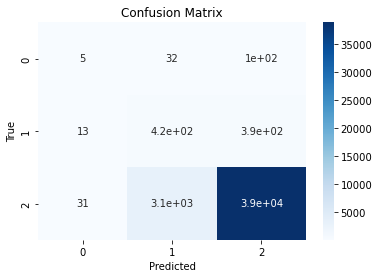

In [113]:
eva = Evaluation()
print("Evaluate model performance on train data")
print("Accuracy:", eva.accuracy(train_pred, y_train))
print("Recall:", eva.recall(train_pred, y_train))
print("Precision:", eva.precision(train_pred, y_train))
print("F1 Score:", eva.f1_score(train_pred, y_train))
print(np.count_nonzero(y_train == "Fatal"))
eva_conf = eva.confusion(train_pred, y_train)
eva.plot_confusion(eva_conf)

Evaluate model performance on test data
Accuracy: 0.9118733877152618
Recall: 0.36403442132146124
Precision: 0.4541500047605446
F1 Score: 0.37540615354183743
16


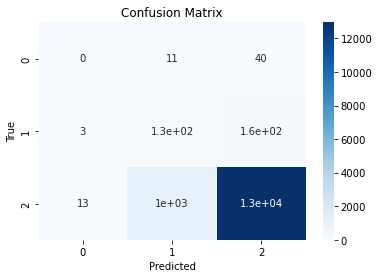

In [112]:
eva = Evaluation()
print("Evaluate model performance on test data")
print("Accuracy:", eva.accuracy(test_pred, y_test))
print("Recall:", eva.recall(test_pred, y_test))
print("Precision:", eva.precision(test_pred, y_test))
print("F1 Score:", eva.f1_score(test_pred, y_test))
print(np.count_nonzero(y_test == "Fatal"))
eva_conf = eva.confusion(test_pred, y_test)
eva.plot_confusion(eva_conf)

Evaluate model performance on test data, given pred is only 'Property Damage Only'
Accuracy: 0.9169629784563899
Recall: 0.3333333333333333
Precision: 0.30565432615212995
F1 Score: 0.3188943444262593
16


/Users/ady/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


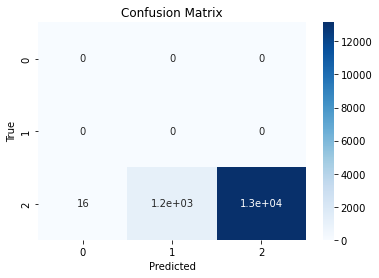

In [117]:
eva = Evaluation()
pred = np.full(len(y_test), 'Property Damage Only')
print("Evaluate model performance on test data, given pred is only 'Property Damage Only'")
print("Accuracy:", eva.accuracy(pred, y_test))
print("Recall:", eva.recall(pred, y_test))
print("Precision:", eva.precision(pred, y_test))
print("F1 Score:", eva.f1_score(pred, y_test))
print(np.count_nonzero(y_test == "Fatal"))
eva_conf = eva.confusion(pred, y_test)
eva.plot_confusion(eva_conf)